# DATA INSIGHTS

## DEPENDENCIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## DATASET PREPERATION AND TRANSFORMATION

In [2]:
# Define paths to your dataset
main_dir = "/home/gurram.ri/Project/CASIA"
# main_dir = "/home/sikhakolli.v/Real_VS_AI/CASIA"

# Define batch size and image dimensions
batch_size = 32
img_height = 224
img_width = 224

# Define transforms for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define full dataset using ImageFolder
full_dataset = datasets.ImageFolder(root=main_dir, transform=transform)

# Print the total number of images and number of classes
print("Total number of images:", len(full_dataset))
print("Number of classes:", len(full_dataset.classes))
# Print the class names
print("Class names:", full_dataset.classes)

Total number of images: 12610
Number of classes: 2
Class names: ['AiArt', 'RealArt']


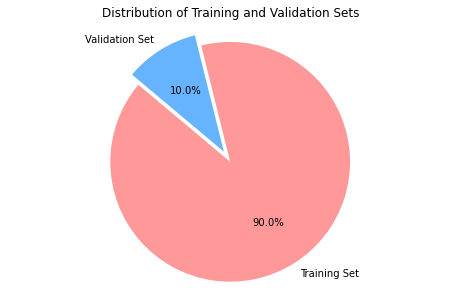

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import random_split

# Define the sizes for training and validation sets
train_size = int(0.9 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Calculate the sizes of training and validation sets
train_count = len(train_dataset)
val_count = len(val_dataset)

# Create a pie chart to visualize the distribution
labels = ['Training Set', 'Validation Set']
sizes = [train_count, val_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice
plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Training and Validation Sets')
plt.show()

## DATA LOADING

In [4]:
# Create a data loader to load a batch of images
data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

# Get a batch of images and labels from the data loader
for images, labels in data_loader:
    # Print batch size, image shape, and label shape
    print("Batch size:", len(images))
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)
    break

Batch size: 32
Image shape: torch.Size([32, 3, 224, 224])
Label shape: torch.Size([32])


## VISUALISATIONS

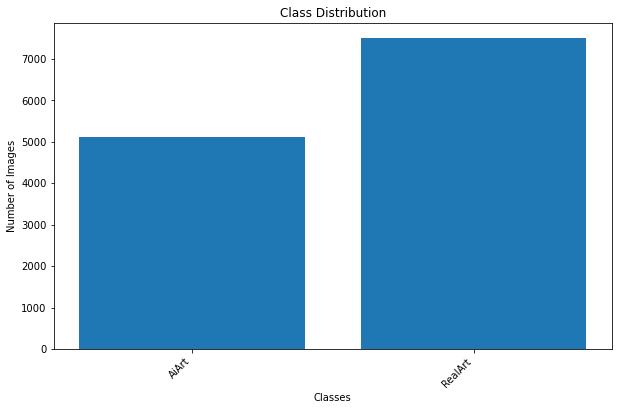

In [5]:
# Calculate class distribution
class_distribution = np.bincount(full_dataset.targets)

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(full_dataset.classes, class_distribution)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

### Image Sample Visualization for each class in the dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


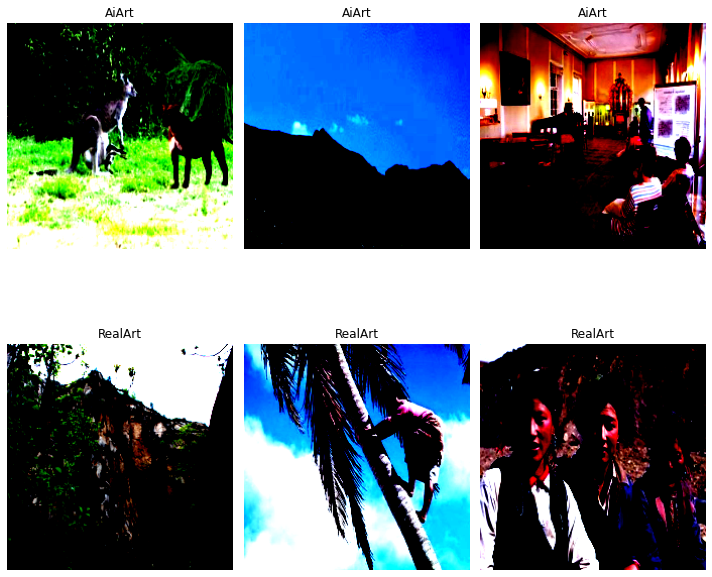

In [6]:
# Define the number of samples to display per class
num_samples_per_class = 3

# Create a new figure for plotting
plt.figure(figsize=(10, 10))

# Iterate over each class in the dataset
for i, class_name in enumerate(full_dataset.classes):
    # Find indices of samples belonging to the current class
    class_indices = [idx for idx, label in enumerate(full_dataset.targets) if label == i]
    
    # Choose random sample indices from the current class without replacement
    sample_indices = np.random.choice(class_indices, num_samples_per_class, replace=False)
    
    # Iterate over the selected sample indices
    for j, sample_idx in enumerate(sample_indices):
        # Get the image and its corresponding label
        image, _ = full_dataset[sample_idx]
        
        # Create a subplot for the current sample
        ax = plt.subplot(len(full_dataset.classes), num_samples_per_class, i * num_samples_per_class + j + 1)
        
        # Plot the image, transposing dimensions from (C, H, W) to (H, W, C) for imshow
        plt.imshow(image.permute(1, 2, 0))
        
        # Set the title of the subplot to the class name
        plt.title(class_name)
        
        # Turn off axis labels
        plt.axis('off')

# Adjust layout to prevent overlapping subplots
plt.tight_layout()

# Show the plot
plt.show()

### PIL Image Sample Visualization for each class in the dataset

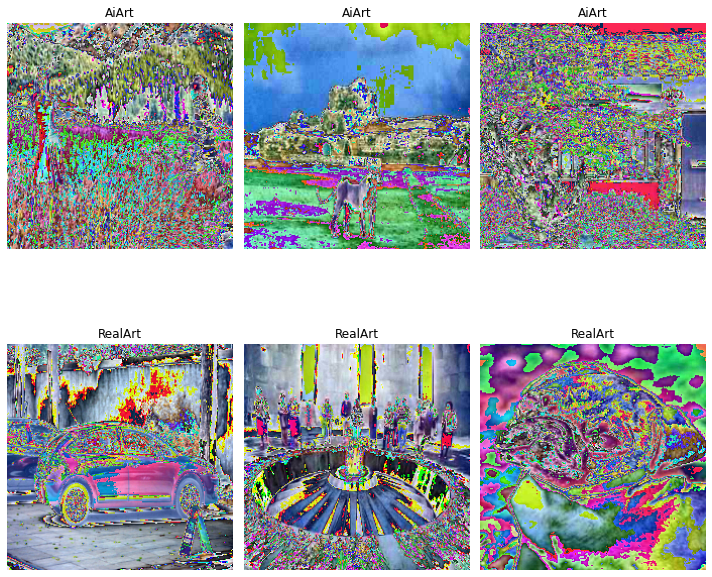

In [7]:
# Set the number of samples to display per class
num_samples_per_class = 3

# Create a new figure for plotting
plt.figure(figsize=(10, 10))

# Iterate over each class in the dataset
for i, class_name in enumerate(full_dataset.classes):
    # Find indices of samples belonging to the current class
    class_indices = [idx for idx, label in enumerate(full_dataset.targets) if label == i]
    
    # Choose random sample indices from the current class without replacement
    sample_indices = np.random.choice(class_indices, num_samples_per_class, replace=False)
    
    # Iterate over the selected sample indices
    for j, sample_idx in enumerate(sample_indices):
        # Get the image and its corresponding label
        image, _ = full_dataset[sample_idx]
        
        # Create a subplot for the current sample
        ax = plt.subplot(len(full_dataset.classes), num_samples_per_class, i * num_samples_per_class + j + 1)
        
        # Plot the image after converting it to a PIL image
        plt.imshow(transforms.ToPILImage()(image))
        
        # Set the title of the subplot to the class name
        plt.title(class_name)
        
        # Turn off axis labels
        plt.axis('off')

# Adjust layout to prevent overlapping subplots
plt.tight_layout()

# Show the plot
plt.show()